# Actividad

- **Nombre**: Fernando Silveyra
- **Matrícula**: A01198019

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.


**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para hacer las gráficas más bonitas cambiamos el estilo a Seaborn
sns.set()

df = pd.read_csv('data/presion.csv')
df.head()

,edad,presion,Unnamed: 2
0,56,148,NaN
1,45,120,NaN
2,72,159,NaN
3,36,118,NaN
4,63,146,NaN


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión


Text(0.5, 1.0, 'Edad vs. Presion')

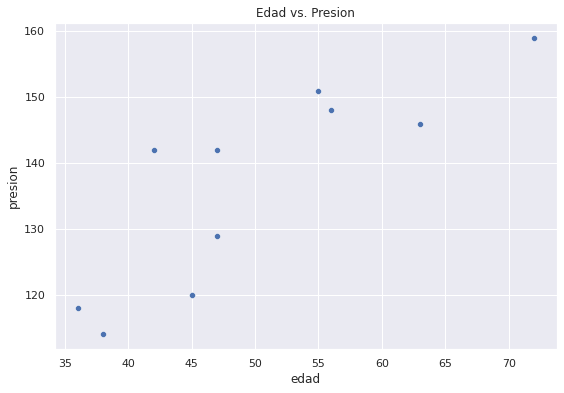

In [ ]:
fig = plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='edad', y='presion')
plt.title('Edad vs. Presion')

3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como * pendiente *, y $ b $ se conoce comúnmente como * intersección *.

¿Cuál es el valor de a y cuál es el valor de b?

In [ ]:
from sklearn.linear_model import LinearRegression


lm1 = LinearRegression()

lm1.fit(df[['edad']], df['presion'])
print('Edad vs presion')
print('beta_0 "b": ', lm1.intercept_)
print('beta_1 "a": ', lm1.coef_)
print('Score: ', lm1.score(df[['edad']], df['presion']), '\n')

Edad vs presion
beta_0 "b":  79.36850719269533
beta_1 "a":  [1.14833319]
Score:  0.7038682124593323 



4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


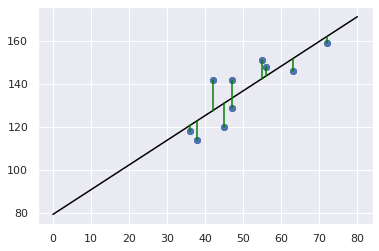

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
x=df['edad']
y=df['presion']

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");

4. ¿Cuál es la presión arterial esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
edad_calcular=76

def presion(edad):
  a=1.14833319
  b=79.36850719269533
  y=a*edad+b
  return y

presion(edad_calcular)

166.64182963269533

**Ventas de mi negocio**

Nuestro objetivo será contruir un modelo que prediga las ventas del producto dependiendo de cuánto presupuesto se gaste en cada medio.

1. Carga los datos del archivo AdvmiNegocio.csv

In [ ]:
df = pd.read_csv('data/AdvmiNegocio.csv')
df.head()

,Unnamed: 0,Redes,Youtube,TV,sales
0,1,6903,1134,2076,663
1,2,1335,1179,1353,312
2,3,516,1377,2079,279
3,4,4545,1239,1755,555
4,5,5424,324,1752,387


In [ ]:
df = df.iloc[:, 1::]
df.head()

,Redes,Youtube,TV,sales
0,6903,1134,2076,663
1,1335,1179,1353,312
2,516,1377,2079,279
3,4545,1239,1755,555
4,5424,324,1752,387


2. Generar una grafica para visuaizar  cómo se relaciona cada columna de presupuesto contra las ventas. De mi negocio. ( Redes,Youtube,TV)


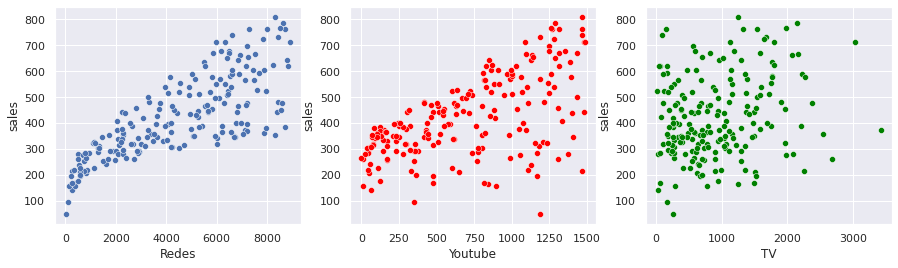

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))

sns.scatterplot(data=df, x='Redes',y='sales', ax=axs[0])

sns.scatterplot(data=df, x='Youtube',y='sales', ax=axs[1], color='red')

sns.scatterplot(data=df, x='TV',y='sales', ax=axs[2], color='green')

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?
En la primera gráfica, podemos ver una relación fuerte positiva entre las redes y las ventas.

En las segunda gráfica, tambien podemos ver una relación positiva. Sin embargo, los datos en esta estan más dispersos que en la primera gráfica.

En la tercera gráfica, los datos estan muy difusos y parecen carecer de correlación.

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para Redes vs Ventas, TV vs Ventas y YouTube vs Ventas?

In [ ]:

lm1 = LinearRegression()

lm1.fit(df[['Redes']], df['sales'])
print('Redes')
print('beta_0: ', lm1.intercept_)
print('beta_1: ', lm1.coef_)
print('Score: ', lm1.score(df[['Redes']], df['sales']), '\n')

lm2 = LinearRegression()

lm2.fit(df[['TV']], df['sales'])
print('TV')
print('beta_0: ', lm2.intercept_)
print('beta_1: ', lm2.coef_)
print('Score: ', lm2.score(df[['TV']], df['sales']), '\n')

lm3 = LinearRegression()

lm3.fit(df[['Youtube']], df['sales'])
print('Youtube')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_)
print('Score: ', lm3.score(df[['Youtube']], df['sales']))

Redes
beta_0:  210.97780647383084
beta_1:  [0.04753664]
Score:  0.611875050850071 

TV
beta_0:  370.5422120783448
beta_1:  [0.0546931]
Score:  0.05212044544430494 

Youtube
beta_0:  279.3491428547485
beta_1:  [0.20249578]
Score:  0.33203245544529536


#5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?
1. Redes vs Sales
2. Youtube vs Sales
3. TV vs Sales

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado?



In [34]:
lm4 = LinearRegression()

lm4.fit(df[['Redes', 'Youtube']], df['sales'])
print('Redes y Youtube')
print('beta_0: ', lm4.intercept_)
print('betas: ', lm4.coef_)
print('Score: ', lm4.score(df[['Redes', 'Youtube']], df['sales']), '\n')


lm5 = LinearRegression()

lm5.fit(df[['Redes','TV']], df['sales'])
print('Redes y TV')
print('beta_0: ', lm5.intercept_)
print('betas: ', lm5.coef_)
print('Score: ', lm5.score(df[['Redes','TV']], df['sales']), '\n')



lm6 = LinearRegression()

lm6.fit(df[['Youtube','TV']], df['sales'])
print('Youtube y TV')
print('beta_0: ', lm6.intercept_)
print('betas: ', lm6.coef_)
print('Score: ', lm6.score(df[['Youtube','TV']], df['sales']))

Redes y Youtube
beta_0:  87.63299737215414
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956 

Redes y TV
beta_0:  173.24843903734896
betas:  [0.04690121 0.04421942]
Score:  0.6458354938293271 

Youtube y TV
beta_0:  275.66761377589694
betas:  [0.19904459 0.00664417]
Score:  0.33270518395032256


In [35]:

def score_adj(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [36]:
print('Redes y Youtube')
print('beta_0: ', lm4.intercept_)
print('betas: ', lm4.coef_)
print('Score: ', lm4.score(df[['Redes', 'Youtube']], df['sales']))
print('Score ajustado:', score_adj(df[['Redes', 'Youtube']],
                                   df['sales'], lm4), '\n')

print('Redes y TV')
print('beta_0: ', lm5.intercept_)
print('betas: ', lm5.coef_)
print('Score: ', lm5.score(df[['Redes','TV']], df['sales']))
print('Score ajustado:', score_adj(df[['Redes', 'TV']],
                                   df['sales'], lm5), '\n')

print('Youtube y TV')
print('beta_0: ', lm6.intercept_)
print('betas: ', lm6.coef_)
print('Score: ', lm6.score(df[['Youtube','TV']], df['sales']))
print('Score ajustado:', score_adj(df[['Youtube', 'TV']], 
                                   df['sales'], lm6), '\n')

lm7 = LinearRegression()

lm7.fit(df[['Redes','Youtube','TV']], df['sales'])
print('Redes, Youtube y TV')
print('beta_0: ', lm7.intercept_)
print('betas: ', lm7.coef_)
print('Score: ', lm7.score(df[['Redes','Youtube','TV']], df['sales']))
print('Score ajustado:', score_adj(df[['Redes','Youtube', 'TV']], 
                                   df['sales'], lm7))

Redes y Youtube
beta_0:  87.63299737215414
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956
Score ajustado: 0.8961505479974428 

Redes y TV
beta_0:  173.24843903734896
betas:  [0.04690121 0.04421942]
Score:  0.6458354938293271
Score ajustado: 0.6422399150864777 

Youtube y TV
beta_0:  275.66761377589694
betas:  [0.19904459 0.00664417]
Score:  0.33270518395032256
Score ajustado: 0.3259306172899198 

Redes, Youtube y TV
beta_0:  88.16668108378224
betas:  [ 0.04576465  0.18853002 -0.00103749]
Score:  0.8972106381789521
Score ajustado: 0.8956373316204667


7.  ¿Cuál modelo es el que nos conviene elegir?

El de 'Redes y TV', por tener el Score ajustado más alto de todos